# **Apex Legends K/D Prediction Project**

# **Imports**

In [1]:
#Numpy
import numpy as np
from numpy import median

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt

#Preprocessor
from numpy import median
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

#Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Regression metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Set global scikit-learn configuration
from sklearn import set_config

#Display estimators as a diagram
set_config(display='diagram')

#Warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading Data**

In [2]:
joe_df= pd.read_csv("/Users/davyd/OneDrive/Documents/Apex_Data_Joe.csv")
joe_df.info()
joe_df.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               24 non-null     object 
 1   Total Damage         23 non-null     float64
 2   Total Kills          23 non-null     float64
 3   Total Deaths         23 non-null     float64
 4   K/D Ratio            23 non-null     float64
 5   Total wins           23 non-null     float64
 6   Total Top 5 finish   23 non-null     float64
 7   Total Games Played   23 non-null     float64
 8   Highest Kills        23 non-null     float64
 9   Knockdowns           23 non-null     float64
 10  Assists              23 non-null     float64
 11  Teamates Revived     23 non-null     float64
 12  Allayna Playing      23 non-null     object 
 13  Teammates Respawned  23 non-null     float64
 14  Win Streak           22 non-null     float64
 15  Ranked Split 1       11 non-null     objec

,Season,Total Damage,Total Kills,Total Deaths,K/D Ratio,Total wins,Total Top 5 finish,Total Games Played,Highest Kills,Knockdowns,Assists,Teamates Revived,Allayna Playing,Teammates Respawned,Win Streak,Ranked Split 1,Ranked Split 2,Win rate%
0,5,8332.0,20.0,50.0,0.40,1.0,12.0,49.0,5.0,21.0,12.0,6.0,no,0.0,1.0,NaN,NaN,2.04%
1,6,2945.0,7.0,16.0,0.44,0.0,2.0,15.0,2.0,7.0,2.0,0.0,no,0.0,0.0,NaN,NaN,0%
2,7,111421.0,234.0,543.0,0.43,19.0,139.0,525.0,5.0,318.0,179.0,68.0,no,15.0,2.0,NaN,NaN,3.62%
3,7R,32709.0,68.0,169.0,0.40,6.0,51.0,167.0,4.0,89.0,47.0,24.0,no,5.0,2.0,gold 4,silver 4,3.59%
4,8,168498.0,383.0,811.0,0.47,24.0,200.0,773.0,8.0,522.0,271.0,144.0,no,31.0,2.0,NaN,NaN,3.10%
5,8R,55867.0,127.0,308.0,0.41,8.0,72.0,292.0,5.0,182.0,96.0,50.0,no,9.0,2.0,bronze 1,gold 4,2.74%
6,9,103180.0,261.0,404.0,0.65,21.0,118.0,408.0,7.0,354.0,159.0,101.0,no,19.0,2.0,NaN,NaN,5.15%
7,9R,18689.0,49.0,66.0,0.74,9.0,28.0,64.0,4.0,62.0,29.0,17.0,no,3.0,2.0,bronze2,gold 4,14.06%
8,10,64975.0,164.0,245.0,0.67,13.0,68.0,242.0,5.0,210.0,91.0,54.0,no,3.0,1.0,NaN,NaN,5.37%
9,10R,5910.0,11.0,16.0,0.69,1.0,4.0,15.0,3.0,12.0,8.0,3.0,no,0.0,1.0,silver 4,bronze4,6.67%


## **Creating more columns**

In [3]:
# This column is double checking the math of the K/D Ratio to be sure the game is calculating it correctly.
joe_df['Cal K/D'] = joe_df['Total Kills']/joe_df['Total Deaths']

In [4]:
# This column was created to see the percent of games I placed in the top five within the given season.
joe_df['Top 5 %'] = joe_df['Total Top 5 finish']/joe_df['Total Games Played']

In [5]:
# This column was created to see the ratio of kills for the number of 'knocks'. 
joe_df['kill/knock ratio'] = joe_df['Total Kills']/joe_df['Knockdowns']

In [6]:
# This column was created to see an overall average number of 'knocks' per match in a given season.
joe_df['GamesPlayed/knock ratio'] = joe_df['Total Games Played']/joe_df['Knockdowns']

In [7]:
# This column was created to see an overall average number of assists per match in a given season.
joe_df['Average assists per match'] = joe_df['Assists']/joe_df['Total Games Played']

In [8]:
# This column was created to see an overall average number of damage per match in a given season.
joe_df['Average damage per match'] = joe_df['Total Damage']/joe_df['Total Games Played']

In [9]:
# This column was created to see an overall average number of 'knocks' per match in the given season.
joe_df['GamesPlayed/knock ratio'] = joe_df['Knockdowns']/joe_df['Total Games Played']

In [10]:
# Write a filter to put only ranked seasons in a temporary dataframe.
# Then write out an order of the ranks so that predictions can be made.

In [11]:
#example of how to order the rankings
#rankings = {
#    "bronze 1": 1, "bronze 2": 2, "bronze 3": 3, "bronze 4": 4,
#    "silver 1": 5, "silver 2": 6, "silver 3": 7, "silver 4": 8,
#    "gold 1": 9, "gold 2": 10, "gold 3": 11, "gold 4": 12
#}

# Accessing the ranking value for a given rank
#ranking = "silver 3"
#value = rankings.get(ranking)
#print("Ranking value:", value)


# **Same example, but in R**

In [12]:
# Example of how to code in R for the rankings:
#rankings <- c(
#  "bronze 1" = 1, "bronze 2" = 2, "bronze 3" = 3, "bronze 4" = 4,
#  "silver 1" = 5, "silver 2" = 6, "silver 3" = 7, "silver 4" = 8,
#  "gold 1" = 9, "gold 2" = 10, "gold 3" = 11, "gold 4" = 12
#)

# Accessing the ranking value for a given rank
#ranking <- "gold 2"
#value <- rankings[ranking]
#cat("Ranking value:", value, "\n")

In [13]:
# Printing out the new data frame with the added columns
joe_df.describe()

,Total Damage,Total Kills,Total Deaths,K/D Ratio,Total wins,Total Top 5 finish,Total Games Played,Highest Kills,Knockdowns,Assists,Teamates Revived,Teammates Respawned,Win Streak,Cal K/D,Top 5 %,kill/knock ratio,GamesPlayed/knock ratio,Average assists per match,Average damage per match
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,22.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,162988.391304,349.304348,549.695652,0.586522,22.739130,145.000000,545.217391,5.869565,463.913043,239.913043,130.304348,30.739130,1.500000,0.586192,0.277562,0.769279,0.784775,0.427776,285.728027
std,180612.352271,402.162499,549.187535,0.133369,23.302784,137.807178,555.542729,2.221882,522.175424,254.134344,138.471997,32.686135,0.597614,0.132358,0.054174,0.083092,0.164239,0.116024,62.521924
min,2945.000000,7.000000,16.000000,0.400000,0.000000,2.000000,15.000000,2.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.400000,0.133333,0.689362,0.428571,0.133333,170.040816
25%,50243.500000,95.000000,161.000000,0.455000,7.000000,47.000000,161.500000,4.500000,136.500000,76.500000,43.500000,5.000000,1.000000,0.454878,0.249019,0.716656,0.673150,0.352169,235.435729
50%,96665.000000,164.000000,341.000000,0.590000,13.000000,94.000000,307.000000,5.000000,235.000000,159.000000,68.000000,19.000000,2.000000,0.591278,0.274984,0.743902,0.813149,0.453125,301.071759
75%,207003.500000,466.000000,818.000000,0.670000,30.500000,210.500000,794.000000,7.000000,630.000000,314.000000,169.500000,47.500000,2.000000,0.667421,0.296857,0.785637,0.897339,0.503472,318.104733
max,561126.000000,1320.000000,1763.000000,0.830000,80.000000,433.000000,1778.000000,11.000000,1662.000000,848.000000,466.000000,110.000000,2.000000,0.830065,0.437500,1.000000,1.019096,0.641026,394.000000


In [14]:
#Saving the new dataframe to upload for other platforms.
joe_df.to_csv('Joe_data_frame', index=False)

In [15]:
# Calculate the average number of kills per season.
avK = joe_df["Total Kills"].mean()

# Convert the average number of kills per season into an integer.
avK_int = int(avK)

# Print the average number of kills in a season.
print("The average number of total kills per season is:", avK_int, "-ouch")

The average number of total kills per season is: 349 -ouch


In [16]:
# Calculating the average damage per season.
avd = joe_df["Total Damage"].mean()

# Convert the average to an integer
avd_int = int(avd)

# Print the average total damage per season
print("The average total damage per season is:", avd_int)

The average total damage per season is: 162988


In [17]:
# Finding the average number of Top 5 finishes per season
av5 = joe_df["Total Top 5 finish"].mean()

# Convert the mean value to an integer
av5_int = int(av5)

# Print the average number of top time finishes per season
print("The average number of toal top 5 finishes per season is:", av5_int)

The average number of toal top 5 finishes per season is: 145


In [18]:
joe_df.head()

,Season,Total Damage,Total Kills,Total Deaths,K/D Ratio,Total wins,Total Top 5 finish,Total Games Played,Highest Kills,Knockdowns,...,Win Streak,Ranked Split 1,Ranked Split 2,Win rate%,Cal K/D,Top 5 %,kill/knock ratio,GamesPlayed/knock ratio,Average assists per match,Average damage per match
0,5,8332.0,20.0,50.0,0.40,1.0,12.0,49.0,5.0,21.0,...,1.0,NaN,NaN,2.04%,0.400000,0.244898,0.952381,0.428571,0.244898,170.040816
1,6,2945.0,7.0,16.0,0.44,0.0,2.0,15.0,2.0,7.0,...,0.0,NaN,NaN,0%,0.437500,0.133333,1.000000,0.466667,0.133333,196.333333
2,7,111421.0,234.0,543.0,0.43,19.0,139.0,525.0,5.0,318.0,...,2.0,NaN,NaN,3.62%,0.430939,0.264762,0.735849,0.605714,0.340952,212.230476
3,7R,32709.0,68.0,169.0,0.40,6.0,51.0,167.0,4.0,89.0,...,2.0,gold 4,silver 4,3.59%,0.402367,0.305389,0.764045,0.532934,0.281437,195.862275
4,8,168498.0,383.0,811.0,0.47,24.0,200.0,773.0,8.0,522.0,...,2.0,NaN,NaN,3.10%,0.472256,0.258732,0.733716,0.675291,0.350582,217.979301


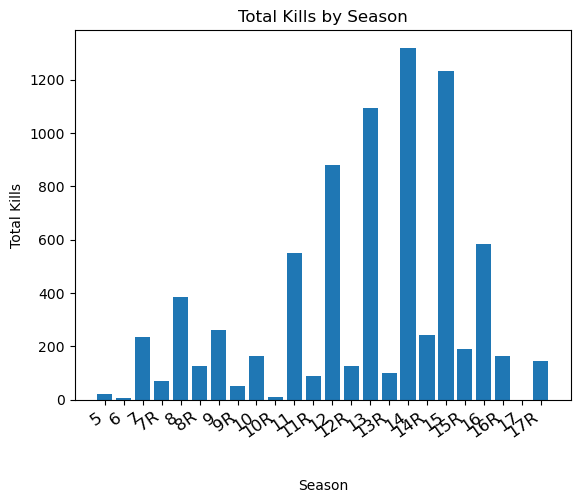

In [19]:
plt.bar(joe_df['Season'], joe_df['Total Kills'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Total Kills')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Total Kills by Season')

# Show the plot
plt.show()

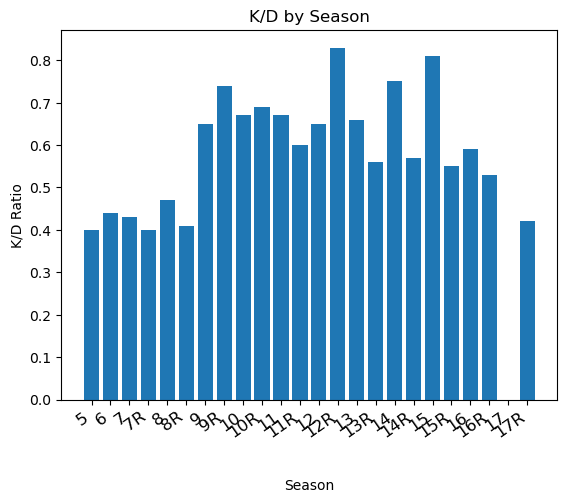

In [20]:
plt.bar(joe_df['Season'], joe_df['K/D Ratio'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('K/D Ratio')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('K/D by Season')

# Show the plot
plt.show()

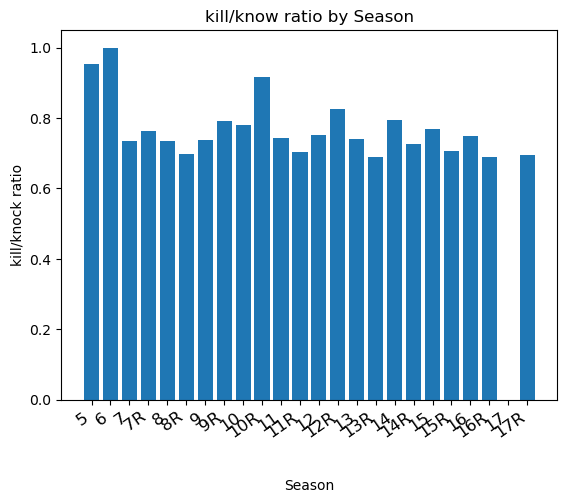

In [21]:
plt.bar(joe_df['Season'], joe_df['kill/knock ratio'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('kill/knock ratio')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('kill/know ratio by Season')

# Show the plot
plt.show()

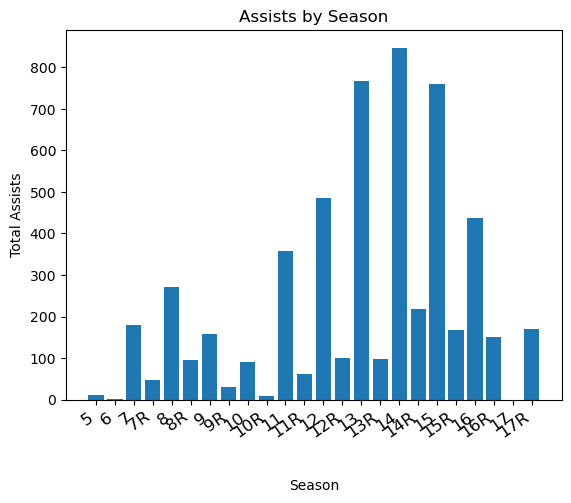

In [22]:
plt.bar(joe_df['Season'], joe_df['Assists'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Total Assists')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Assists by Season')

# Show the plot
plt.show()

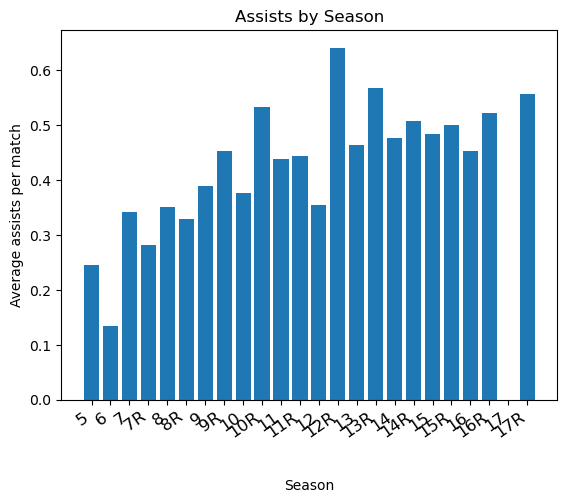

In [23]:
plt.bar(joe_df['Season'], joe_df['Average assists per match'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Average assists per match')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Assists by Season')

# Show the plot
plt.show()

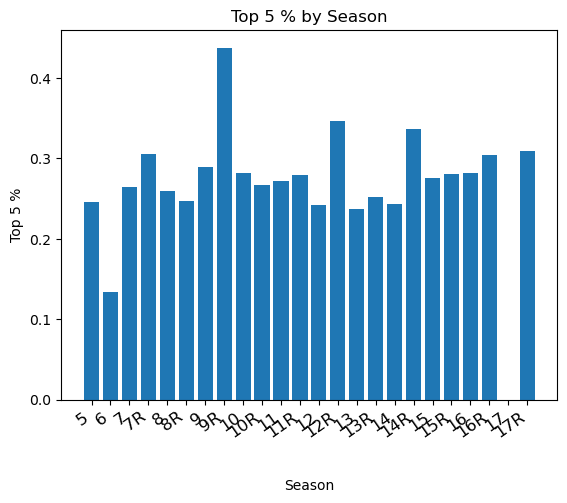

In [24]:
plt.bar(joe_df['Season'], joe_df['Top 5 %'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('Top 5 %')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Top 5 % by Season')

# Show the plot
plt.show()

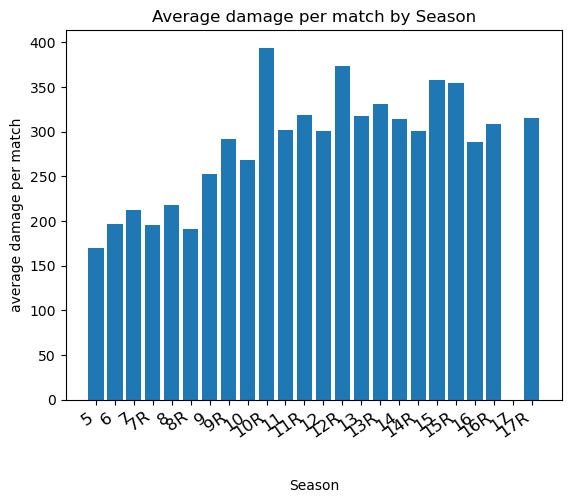

In [25]:
plt.bar(joe_df['Season'], joe_df['Average damage per match'])
# Set plot labels and title
plt.xlabel('Season')
plt.ylabel('average damage per match')
plt.xticks(rotation=35, fontsize = 12, fontweight = 'normal', ha = 'right');
plt.title('Average damage per match by Season')

# Show the plot
plt.show()